In [1]:
spark

In [2]:
books_path = "gs://my-bucket-apb/landing/goodreads_books.json" #creating a path to read the file into dataproc cluster
books_sdf = spark.read.json(books_path)

In [14]:
spark.conf.set("spark.sql.debug.maxToStringFields", 500) #limits field to 500 because there is a lot of data.
books_sdf.show(20) #shows the first 20 records

+----------+--------------------+--------------+--------+------------+--------------------+-------------------+---------+--------------------+--------+----------+-------------+-----------+-------------+--------------------+---------+--------------------+---------------+-----------------+----------------+--------------------+-------------+---------+--------------------+------------------+--------------------+--------------------+--------------------+--------+
|      asin|             authors|average_rating| book_id|country_code|         description|edition_information|   format|           image_url|is_ebook|      isbn|       isbn13|kindle_asin|language_code|                link|num_pages|     popular_shelves|publication_day|publication_month|publication_year|           publisher|ratings_count|   series|       similar_books|text_reviews_count|               title|title_without_series|                 url| work_id|
+----------+--------------------+--------------+--------+------------+----

In [11]:
books_sdf.printSchema() #shows the datatypes

root
 |-- asin: string (nullable = true)
 |-- authors: array (nullable = true)
 |    |-- element: struct (containsNull = true)
 |    |    |-- author_id: string (nullable = true)
 |    |    |-- role: string (nullable = true)
 |-- average_rating: string (nullable = true)
 |-- book_id: string (nullable = true)
 |-- country_code: string (nullable = true)
 |-- description: string (nullable = true)
 |-- edition_information: string (nullable = true)
 |-- format: string (nullable = true)
 |-- image_url: string (nullable = true)
 |-- is_ebook: string (nullable = true)
 |-- isbn: string (nullable = true)
 |-- isbn13: string (nullable = true)
 |-- kindle_asin: string (nullable = true)
 |-- language_code: string (nullable = true)
 |-- link: string (nullable = true)
 |-- num_pages: string (nullable = true)
 |-- popular_shelves: array (nullable = true)
 |    |-- element: struct (containsNull = true)
 |    |    |-- count: string (nullable = true)
 |    |    |-- name: string (nullable = true)
 |-- pub

In [4]:
list_of_columns=books_sdf.columns #list of coloumns in the books dataframe
print(list_of_columns)

['asin', 'authors', 'average_rating', 'book_id', 'country_code', 'description', 'edition_information', 'format', 'image_url', 'is_ebook', 'isbn', 'isbn13', 'kindle_asin', 'language_code', 'link', 'num_pages', 'popular_shelves', 'publication_day', 'publication_month', 'publication_year', 'publisher', 'ratings_count', 'series', 'similar_books', 'text_reviews_count', 'title', 'title_without_series', 'url', 'work_id']


In [5]:
print(len(list_of_columns)) #number of columns in the books dataframe

29


In [7]:
books_sdf.count() #number of records in the books dataframe

2360655

In [13]:
# Check for records with Null values
from pyspark.sql.functions import col, isnan, isnull, when, count, udf

books_sdf.select([count(when(isnull(c), c)).alias(c) for c in books_sdf.columns ]).show()

+----+-------+--------------+-------+------------+-----------+-------------------+------+---------+--------+----+------+-----------+-------------+----+---------+---------------+---------------+-----------------+----------------+---------+-------------+------+-------------+------------------+-----+--------------------+---+-------+
|asin|authors|average_rating|book_id|country_code|description|edition_information|format|image_url|is_ebook|isbn|isbn13|kindle_asin|language_code|link|num_pages|popular_shelves|publication_day|publication_month|publication_year|publisher|ratings_count|series|similar_books|text_reviews_count|title|title_without_series|url|work_id|
+----+-------+--------------+-------+------------+-----------+-------------------+------+---------+--------+----+------+-----------+-------------+----+---------+---------------+---------------+-----------------+----------------+---------+-------------+------+-------------+------------------+-----+--------------------+---+-------+
|   

In [35]:
books_sdf = spark.read.format("json").load('gs://my-bucket-apb/landing/goodreads_books.json')

# Calculate the statistics for the average_rating column
rating_stats = books_sdf.select(
    min(col("average_rating")).alias("min_rating"),
    max(col("average_rating")).alias("max_rating"),
    avg(col("average_rating")).alias("avg_rating"),
    stddev(col("average_rating")).alias("stdev_rating")
)
# Show the statistics
rating_stats.show()


+----------+----------+-----------------+------------------+
|min_rating|max_rating|       avg_rating|      stdev_rating|
+----------+----------+-----------------+------------------+
|          |      5.00|3.865792441182297|0.5406797641219326|
+----------+----------+-----------------+------------------+



In [54]:
# Calculate the statistics for the text_reviews column

text_reviews_stats= books_sdf.select(
    min(col("text_reviews_count")).alias("min_text_reviews_count"),
    max(col("text_reviews_count")).alias("max_text_reviews_count"),
    avg(col("text_reviews_count")).alias("avg_text_reviews_count"),
    stddev(col("text_reviews_count")).alias("stddev_text_reviews_count")
)

text_reviews_stats.show()

+----------------------+----------------------+----------------------+-------------------------+
|min_text_reviews_count|max_text_reviews_count|avg_text_reviews_count|stddev_text_reviews_count|
+----------------------+----------------------+----------------------+-------------------------+
|                      |                   999|    28.086682900228844|        378.7806470544976|
+----------------------+----------------------+----------------------+-------------------------+



In [56]:
# Calculate the statistics for the num_pages column

num_pages_stats= books_sdf.select(
    min(col("num_pages")).alias("min_num_pages"),
    max(col("num_pages")).alias("max_num_pages"),
    avg(col("num_pages")).alias("avg_num_pages"),
    stddev(col("num_pages")).alias("stddev_num_pages")
)

num_pages_stats.show()

+-------------+-------------+------------------+-----------------+
|min_num_pages|max_num_pages|     avg_num_pages| stddev_num_pages|
+-------------+-------------+------------------+-----------------+
|             |          999|263.56388574664174|829.8744162468138|
+-------------+-------------+------------------+-----------------+



In [22]:
# Group by the 'format' column and count the number of occurrences
format_counts = books_sdf.groupBy("format").agg(count("*").alias("count"))

format_counts.show()

+--------------------+-----+
|              format|count|
+--------------------+-----+
|              broche|   39|
|           Capa Mole|  400|
|            chapbook|  212|
|     Klappenbroschur|  213|
|          Papaerback|    1|
| Overdrive Audiobook|    1|
|      Audio Cassette| 1152|
|             Webtoon|   30|
|     Paperback Manga|   30|
|Large Print Paper...|    3|
|  online short story|    1|
|          Audio CD's|    1|
|             Digital|   15|
|    Large Hard Cover|    1|
|               Comic|  351|
|             Unbound|  429|
|            Inbunden|   13|
|                 pdf|   39|
|            Fancomic|   12|
|          Paper back|   46|
+--------------------+-----+
only showing top 20 rows



In [24]:
from pyspark.sql.functions import count

# Filter the DataFrame for hardcover and paperback books only
hardcover_count = books_sdf.filter(books_sdf["format"].isin("Hardcover")).count()
paperback_count = books_sdf.filter(books_sdf["format"].isin("Paperback")).count()

print("Hardcover books count:", hardcover_count)
print("Paperback books count:", paperback_count)


Hardcover books count: 359563
Paperback books count: 894617


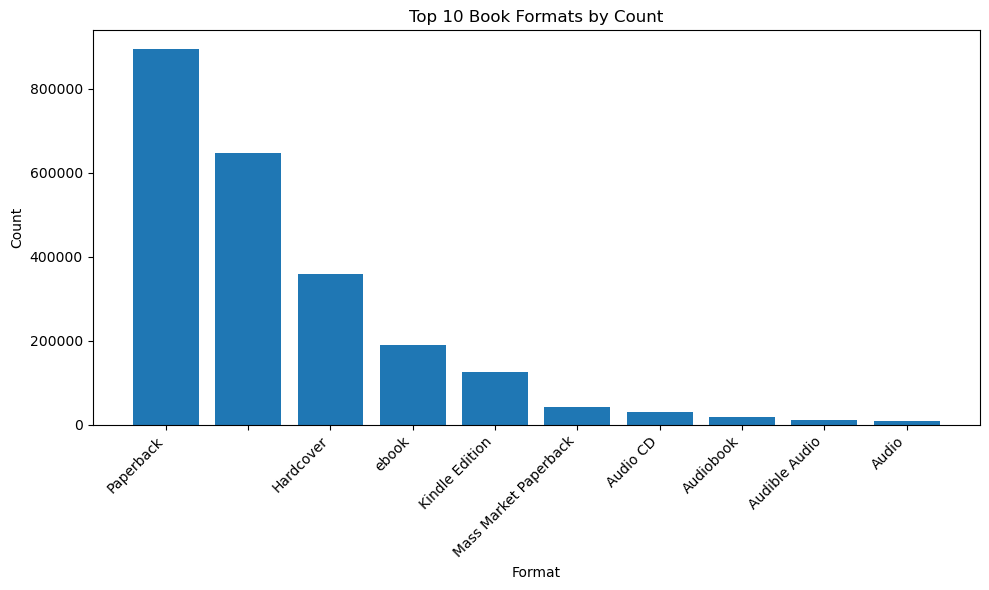

In [8]:
import matplotlib.pyplot as plt

# Count the occurrences of each format
format_counts = books_sdf.groupBy("format").count().orderBy("count", ascending=False)

# Convert to Pandas DataFrame for visualization
format_counts_df = format_counts.limit(10).toPandas()  # Limit to top 10 formats in order to scale 

# Plot the histogram 
plt.figure(figsize=(10, 6))
plt.bar(format_counts_df["format"], format_counts_df["count"])
plt.xlabel("Format")
plt.ylabel("Count")
plt.title("Top 10 Book Formats by Count")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

In [36]:
from pyspark.sql.functions import concat, col, lit

# Create a new column called publication date by concatenating the information stored in year, month, day.  
books_sdf = books_sdf.withColumn(
    "publication_date",
    concat(
        col("publication_year"),
        lit("-"),
        col("publication_month"),
        lit("-"),
        col("publication_day")
    )
)

# Drop the publication_day, publication_month, and publication_year columns
books_sdf = books_sdf.drop("publication_day", "publication_month", "publication_year")

# Show the first 5 rows with the new publication_date column
books_sdf.show(5)


+----------+------------+--------------+-------+------------+--------------------+-------------------+---------+--------------------+--------+----------+-------------+-----------+-------------+--------------------+---------+--------------------+--------------------+-------------+--------+--------------------+------------------+--------------------+--------------------+--------------------+-------+----------------+
|      asin|     authors|average_rating|book_id|country_code|         description|edition_information|   format|           image_url|is_ebook|      isbn|       isbn13|kindle_asin|language_code|                link|num_pages|     popular_shelves|           publisher|ratings_count|  series|       similar_books|text_reviews_count|               title|title_without_series|                 url|work_id|publication_date|
+----------+------------+--------------+-------+------------+--------------------+-------------------+---------+--------------------+--------+----------+-----------

In [61]:
#Calculate the min and max date for publication
publication_date_stats = books_sdf.select(
    min(col("publication_date")).alias("min_publication_date"),
    max(col("publication_date")).alias("max_publication_date")
)

# Show the statistics
publication_date_stats.show()

#not accurate: must clean data

+--------------------+--------------------+
|min_publication_date|max_publication_date|
+--------------------+--------------------+
|                  --|              9999--|
+--------------------+--------------------+



In [38]:
# Show distinct values in the publication_date column. To help with data cleaning. 
distinct_dates = books_sdf.select("publication_date").distinct()
distinct_dates.show(truncate=False)


+----------------+
|publication_date|
+----------------+
|2017-9-29       |
|2013-11-5       |
|2017-2-20       |
|1983-10-12      |
|2012-12-5       |
|2014-12-9       |
|2009-3-20       |
|1961-12-1       |
|2002-2-19       |
|2010-4-24       |
|1977-10-6       |
|1997-11-1       |
|2015-11-20      |
|1962-4-16       |
|1981-10-6       |
|2016-3-12       |
|2010-12-7       |
|1998-3-13       |
|2012-2-4        |
|2011-11-4       |
+----------------+
only showing top 20 rows



In [18]:
from pyspark.sql.functions import explode, col, count #explode function used to seperate rows in an array

# Explode the popular_shelves array to separate rows for each shelf
exploded_shelves = books_sdf.withColumn("shelf", explode("popular_shelves"))

# Group by shelf name and count the occurrences
shelf_counts = exploded_shelves.groupBy("shelf.name").agg(count("*").alias("shelf_count"))

# Order the shelf counts in descending order
shelf_counts = shelf_counts.orderBy(col("shelf_count").desc())

shelf_counts.show(truncate=False)

+-----------------+-----------+
|name             |shelf_count|
+-----------------+-----------+
|to-read          |2250255    |
|currently-reading|1670660    |
|owned            |1076805    |
|fiction          |1024874    |
|favorites        |1011757    |
|books-i-own      |891558     |
|kindle           |863654     |
|ebook            |780082     |
|library          |755286     |
|default          |752401     |
|owned-books      |669374     |
|to-buy           |647562     |
|ebooks           |604560     |
|wish-list        |585741     |
|romance          |568960     |
|series           |512458     |
|contemporary     |484039     |
|adult            |481690     |
|my-books         |467491     |
|non-fiction      |457228     |
+-----------------+-----------+
only showing top 20 rows



In [4]:
from pyspark.sql.functions import col, count, sum

# Count the number of books published by each publisher
books_per_publisher = books_sdf.groupBy("publisher").agg(count("*").alias("books_published"))

# Find the total ratings received by each publisher
ratings_per_publisher = books_sdf.groupBy("publisher").agg(sum("ratings_count").alias("total_ratings"))

# Identify the top publishers based on books published
top_publishers_by_books = books_per_publisher.orderBy(col("books_published").desc())

# Identify the top publishers based on total ratings received
top_publishers_by_ratings = ratings_per_publisher.orderBy(col("total_ratings").desc())

# Show the top publishers based on books published
top_publishers_by_books.show()

# Show the top publishers based on total ratings received
top_publishers_by_ratings.show()

#note the top column with no publisher. Must be cleaned.

+--------------------+---------------+
|           publisher|books_published|
+--------------------+---------------+
|                    |         654362|
|Createspace Indep...|          18604|
|  Smashwords Edition|          11513|
|           Harlequin|          10300|
|         Createspace|           9688|
|       HarperCollins|           8173|
|       Penguin Books|           7429|
|Oxford University...|           6741|
|    Brilliance Audio|           6350|
|             Vintage|           6338|
|             Berkley|           5546|
|    Ballantine Books|           5302|
|           Mondadori|           5266|
|Amazon Digital Se...|           5237|
|         CreateSpace|           4876|
|              Bantam|           4841|
|HarperCollins Pub...|           4827|
|             Penguin|           4673|
|              Marvel|           4663|
|        Pocket Books|           4612|
+--------------------+---------------+
only showing top 20 rows



+--------------------+-------------+
|           publisher|total_ratings|
+--------------------+-------------+
|                    | 1.87499512E8|
|Little, Brown and...|  1.6625727E7|
|       HarperCollins|  1.2299512E7|
|       Penguin Books|   1.213777E7|
|              Bantam|  1.1669721E7|
|    Scholastic Press|  1.1485042E7|
|             Vintage|    9557912.0|
|Grand Central Pub...|    9341352.0|
|     Scholastic Inc.|    8802449.0|
|            Scribner|    8108424.0|
|        Pocket Books|    7953899.0|
|             Penguin|    7762848.0|
|    Ballantine Books|    7705183.0|
|               Knopf|    7423363.0|
|    Penguin Classics|    7397624.0|
|             Berkley|    7263672.0|
|    Harper Perennial|    6639473.0|
|HarperCollins Pub...|    6312548.0|
|          HarperTeen|    6226034.0|
|                Avon|    5915134.0|
+--------------------+-------------+
only showing top 20 rows



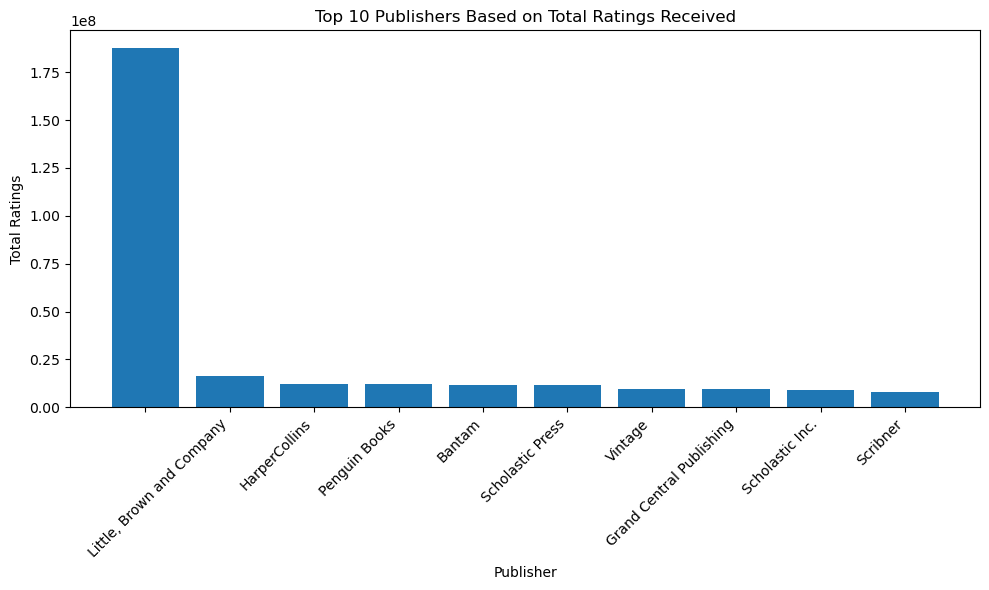

In [12]:
import matplotlib.pyplot as plt
from pyspark.sql import functions as F

# Top publishers based on total ratings received
top_publishers_by_ratings = ratings_per_publisher.orderBy(F.col("total_ratings").desc()).limit(10)

# Convert to Pandas DataFrame in order to visualize 
top_publishers_ratings_df = top_publishers_by_ratings.toPandas()

# Plotting the bar graph using Matplotlib
plt.figure(figsize=(10, 6))
plt.bar(top_publishers_ratings_df["publisher"], top_publishers_ratings_df["total_ratings"])
plt.xlabel("Publisher")
plt.ylabel("Total Ratings")
plt.title("Top 10 Publishers Based on Total Ratings Received")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

In [6]:
from pyspark.sql.functions import explode, count 

# Explode the 'authors' array to separate rows
exploded_authors = books_sdf.select(explode("authors").alias("author"))

# Extract author_id and role from the exploded authors
exploded_authors = exploded_authors.select(
    exploded_authors["author.author_id"].alias("author_id"),
    exploded_authors["author.role"].alias("role")
)

# Count the occurrences of each author and role combination
author_counts = exploded_authors.groupBy("author_id", "role").count()

# Sort authors by the count to find the most popular authors
most_popular_authors = author_counts.orderBy("count", ascending=False)

most_popular_authors.show(truncate=False)

+---------+----+-----+
|author_id|role|count|
+---------+----+-----+
|123715   |    |4538 |
|3389     |    |4160 |
|5158478  |    |2844 |
|947      |    |2489 |
|3780     |    |2485 |
|625      |    |2436 |
|2448     |    |2074 |
|239579   |    |1941 |
|1221698  |    |1929 |
|1265     |    |1904 |
|1654     |    |1752 |
|5481957  |    |1640 |
|3137322  |    |1579 |
|1077326  |    |1556 |
|16667    |    |1512 |
|656983   |    |1430 |
|1069006  |    |1365 |
|4624490  |    |1361 |
|3354     |    |1343 |
|346732   |    |1301 |
+---------+----+-----+
only showing top 20 rows

